# Comparison of the features distributions grouped by the same metric

In this notebook, we compare the distributions (in terms of normalized L1 difference) of features representing the aggregated version of the same metric.

In [1]:
# Command to reload all modules before executing the code
%load_ext autoreload 
%autoreload 2

In [8]:
# ML libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Utils
import os
import sys
from collections import defaultdict
from tqdm import tqdm
import warnings
from typing import List, Dict, Any, Tuple, Union, Optional, Callable, TypeVar
# Project modules
from data_loading import load_dataframe_teamfeatures

warnings.filterwarnings('ignore')

In [2]:
df_teamfeatures_train = load_dataframe_teamfeatures('train')

In [3]:
# Example of distribution difference

from data_analysis import compute_distribution_difference

metric_name = 'HOME_TEAM_SHOTS_OFF_TARGET'
compute_distribution_difference(
    feature_serie1=df_teamfeatures_train[f'{metric_name}_season_sum'],
    feature_serie2=df_teamfeatures_train[f'{metric_name}_season_average'],
    n_monte_carlo=200,
)

{'l1_loss': 6.972524274635385,
 'l2_loss': 36.841320744614094,
 'kl_divergence': 39.68806149054414}

Metric: HOME_TEAM_SHOTS_TOTAL
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


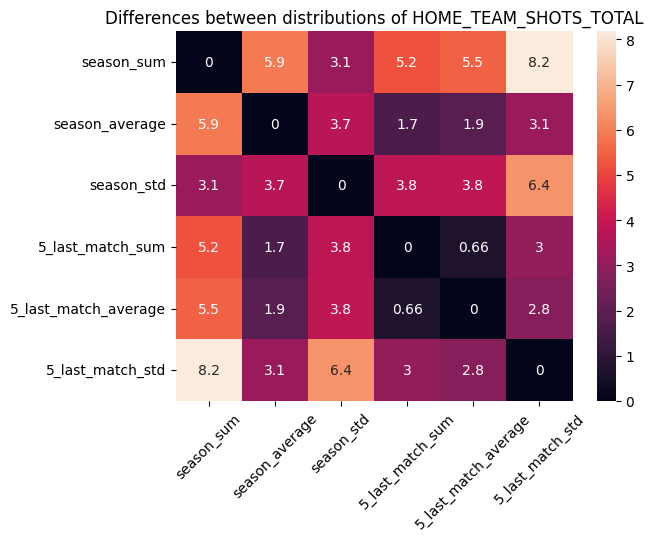

[[0.         5.90051623 3.13073629 5.23368576 5.46857358 8.17637676]
 [5.90051623 0.         3.71079346 1.65325878 1.88700191 3.13224879]
 [3.13073629 3.71079346 0.         3.83000355 3.84887398 6.36106585]
 [5.23368576 1.65325878 3.83000355 0.         0.66225219 3.03234591]
 [5.46857358 1.88700191 3.84887398 0.66225219 0.         2.76809729]
 [8.17637676 3.13224879 6.36106585 3.03234591 2.76809729 0.        ]]
Metric: HOME_TEAM_SHOTS_INSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


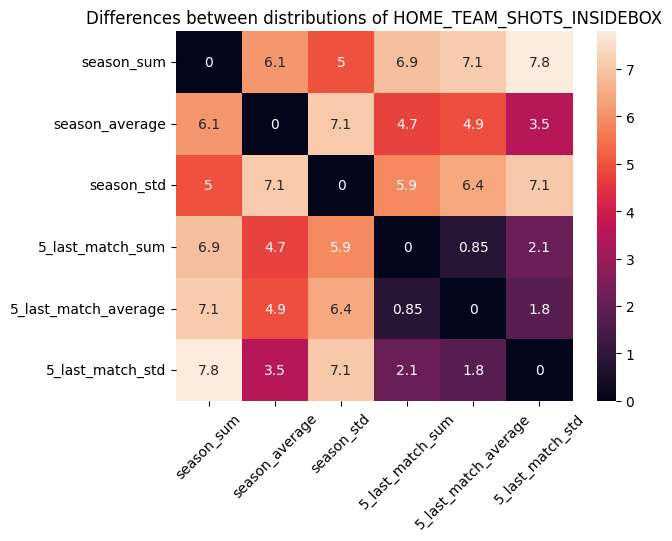

[[0.         6.13672166 4.9795115  6.89896619 7.1385183  7.78549785]
 [6.13672166 0.         7.0990159  4.74018525 4.91047077 3.52554293]
 [4.9795115  7.0990159  0.         5.88488163 6.44236384 7.08270946]
 [6.89896619 4.74018525 5.88488163 0.         0.84790859 2.12463979]
 [7.1385183  4.91047077 6.44236384 0.84790859 0.         1.76915472]
 [7.78549785 3.52554293 7.08270946 2.12463979 1.76915472 0.        ]]
Metric: HOME_TEAM_SHOTS_OFF_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


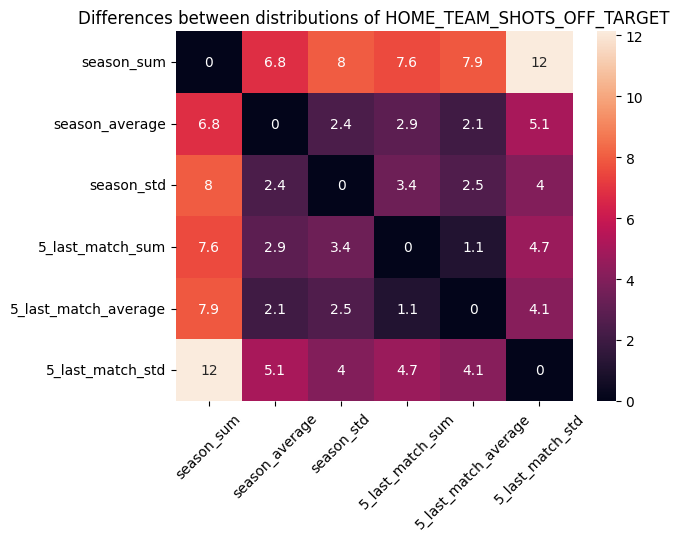

[[ 0.          6.79851523  7.96804091  7.5662728   7.86462051 12.12784987]
 [ 6.79851523  0.          2.39352499  2.92401417  2.06964565  5.05612254]
 [ 7.96804091  2.39352499  0.          3.38262672  2.54618672  4.02542014]
 [ 7.5662728   2.92401417  3.38262672  0.          1.13637206  4.66378762]
 [ 7.86462051  2.06964565  2.54618672  1.13637206  0.          4.12671352]
 [12.12784987  5.05612254  4.02542014  4.66378762  4.12671352  0.        ]]
Metric: HOME_TEAM_SHOTS_ON_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


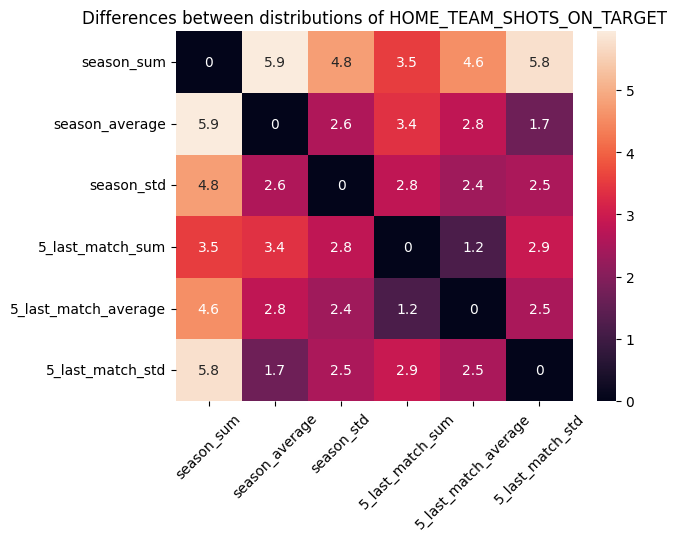

[[0.         5.9419001  4.76335468 3.53896128 4.55844846 5.77144088]
 [5.9419001  0.         2.56875664 3.37975697 2.80798671 1.67686571]
 [4.76335468 2.56875664 0.         2.79098602 2.35253796 2.51252346]
 [3.53896128 3.37975697 2.79098602 0.         1.1644504  2.94543093]
 [4.55844846 2.80798671 2.35253796 1.1644504  0.         2.50285565]
 [5.77144088 1.67686571 2.51252346 2.94543093 2.50285565 0.        ]]
Metric: HOME_TEAM_SHOTS_OUTSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


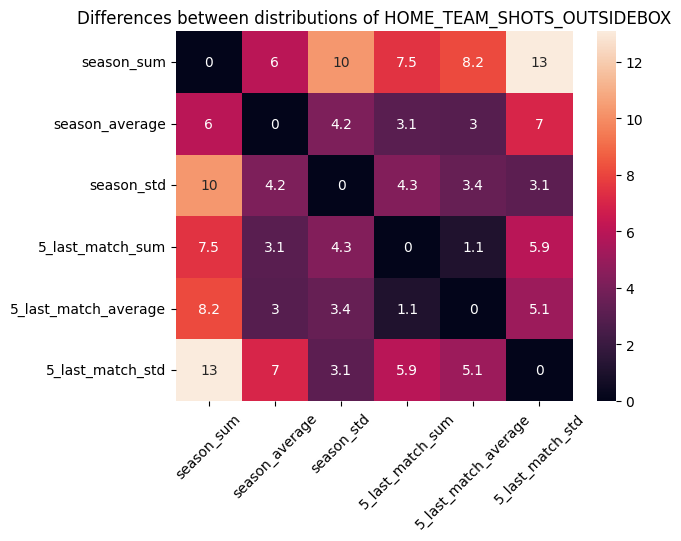

[[ 0.          5.9742579  10.28813553  7.49017068  8.15872286 13.06946762]
 [ 5.9742579   0.          4.15947688  3.06235283  2.95357195  7.02717377]
 [10.28813553  4.15947688  0.          4.29852141  3.4406291   3.14347436]
 [ 7.49017068  3.06235283  4.29852141  0.          1.10937411  5.94421405]
 [ 8.15872286  2.95357195  3.4406291   1.10937411  0.          5.06264913]
 [13.06946762  7.02717377  3.14347436  5.94421405  5.06264913  0.        ]]
Metric: HOME_TEAM_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


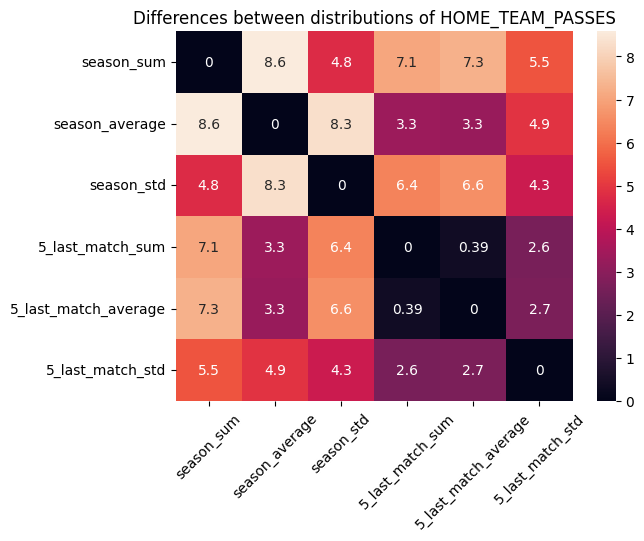

[[0.         8.58324769 4.75741884 7.07303491 7.28668179 5.50131366]
 [8.58324769 0.         8.28314688 3.33187178 3.27230289 4.909703  ]
 [4.75741884 8.28314688 0.         6.36652459 6.58651329 4.32432479]
 [7.07303491 3.33187178 6.36652459 0.         0.39366342 2.64692978]
 [7.28668179 3.27230289 6.58651329 0.39366342 0.         2.70674269]
 [5.50131366 4.909703   4.32432479 2.64692978 2.70674269 0.        ]]
Metric: HOME_TEAM_SUCCESSFUL_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


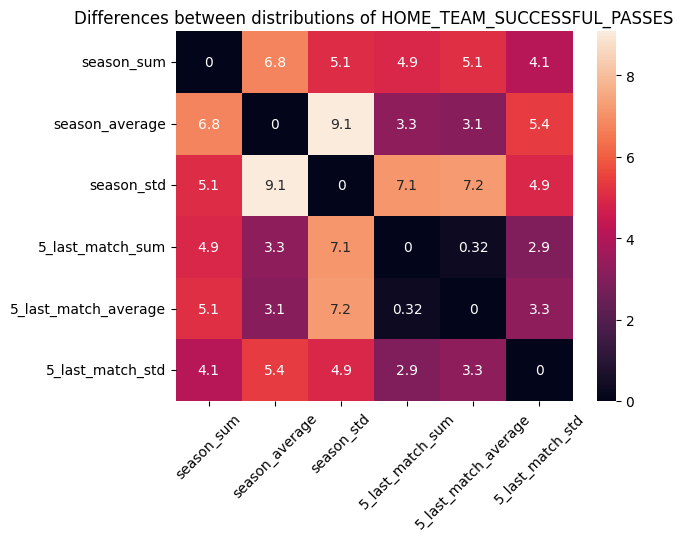

[[0.         6.76128837 5.05583195 4.91018472 5.12324726 4.11183265]
 [6.76128837 0.         9.08201381 3.25443405 3.1096078  5.37668063]
 [5.05583195 9.08201381 0.         7.12246337 7.23523551 4.9282619 ]
 [4.91018472 3.25443405 7.12246337 0.         0.31675773 2.91324468]
 [5.12324726 3.1096078  7.23523551 0.31675773 0.         3.25262613]
 [4.11183265 5.37668063 4.9282619  2.91324468 3.25262613 0.        ]]
Metric: HOME_TEAM_SAVES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


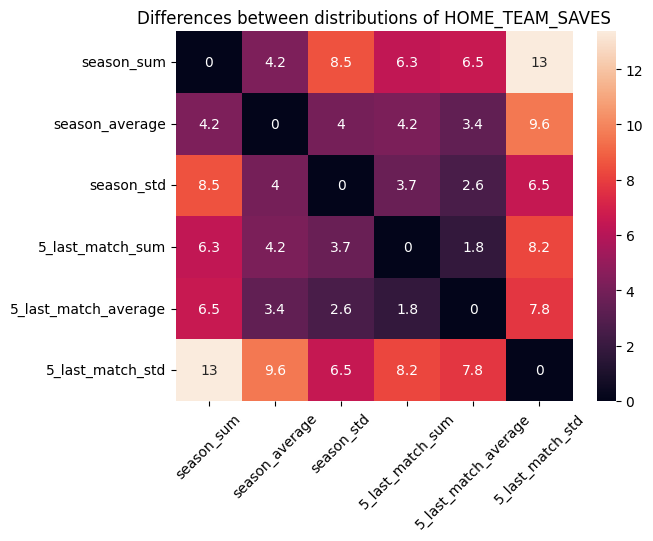

[[ 0.          4.22858346  8.51382793  6.32725244  6.53502666 13.36291264]
 [ 4.22858346  0.          3.99909918  4.17765585  3.38719418  9.56316371]
 [ 8.51382793  3.99909918  0.          3.65307198  2.60840687  6.52339395]
 [ 6.32725244  4.17765585  3.65307198  0.          1.78704474  8.22193866]
 [ 6.53502666  3.38719418  2.60840687  1.78704474  0.          7.75815773]
 [13.36291264  9.56316371  6.52339395  8.22193866  7.75815773  0.        ]]
Metric: HOME_TEAM_CORNERS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


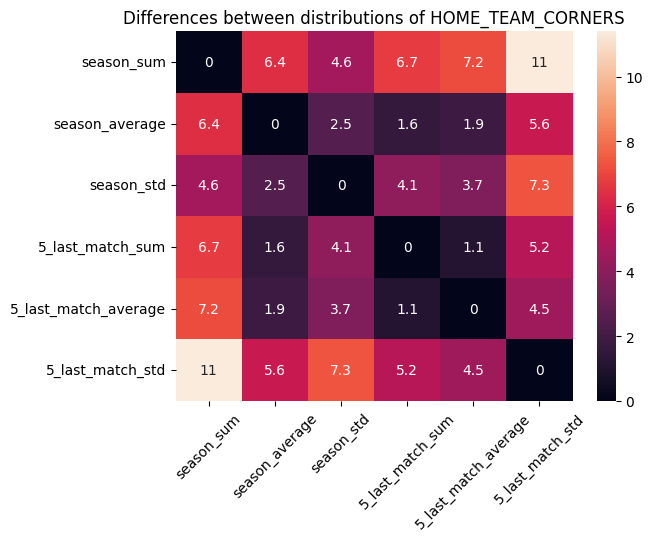

[[ 0.          6.40435792  4.59226198  6.73627651  7.15981317 11.39434772]
 [ 6.40435792  0.          2.50407134  1.58556565  1.8646551   5.64239267]
 [ 4.59226198  2.50407134  0.          4.12800767  3.6701209   7.33088186]
 [ 6.73627651  1.58556565  4.12800767  0.          1.09737215  5.16036789]
 [ 7.15981317  1.8646551   3.6701209   1.09737215  0.          4.53261395]
 [11.39434772  5.64239267  7.33088186  5.16036789  4.53261395  0.        ]]
Metric: HOME_TEAM_FOULS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


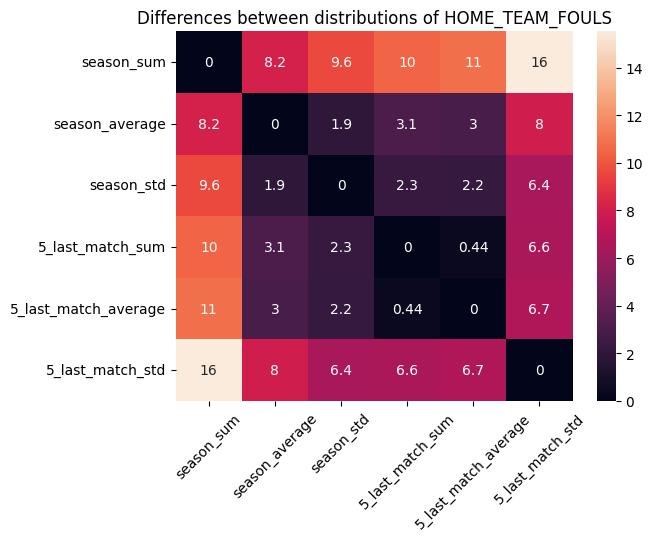

[[ 0.          8.17467455  9.60153718 10.46357893 10.80645952 15.52302687]
 [ 8.17467455  0.          1.91328501  3.13177785  3.02459033  7.98340371]
 [ 9.60153718  1.91328501  0.          2.25654337  2.20326663  6.44333314]
 [10.46357893  3.13177785  2.25654337  0.          0.43998982  6.56858075]
 [10.80645952  3.02459033  2.20326663  0.43998982  0.          6.7170587 ]
 [15.52302687  7.98340371  6.44333314  6.56858075  6.7170587   0.        ]]
Metric: HOME_TEAM_YELLOWCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


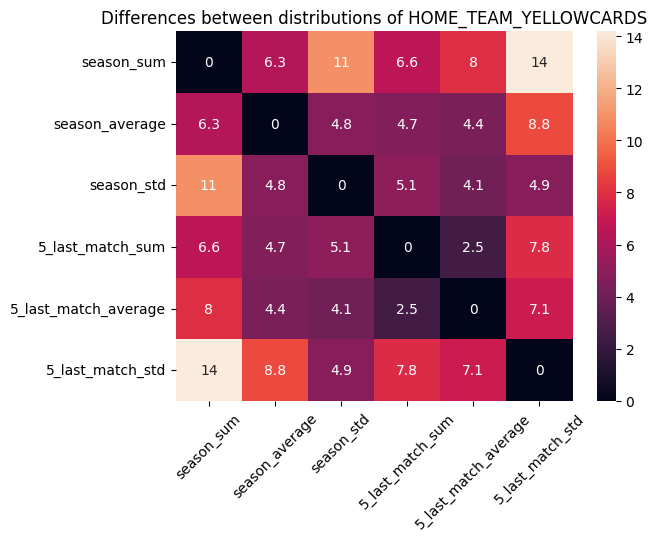

[[ 0.          6.26425018 10.8813412   6.57196019  7.97118429 14.18249712]
 [ 6.26425018  0.          4.83558415  4.68999025  4.43553288  8.80951886]
 [10.8813412   4.83558415  0.          5.0538722   4.0753019   4.85052277]
 [ 6.57196019  4.68999025  5.0538722   0.          2.50181362  7.81360839]
 [ 7.97118429  4.43553288  4.0753019   2.50181362  0.          7.12462098]
 [14.18249712  8.80951886  4.85052277  7.81360839  7.12462098  0.        ]]
Metric: HOME_TEAM_REDCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


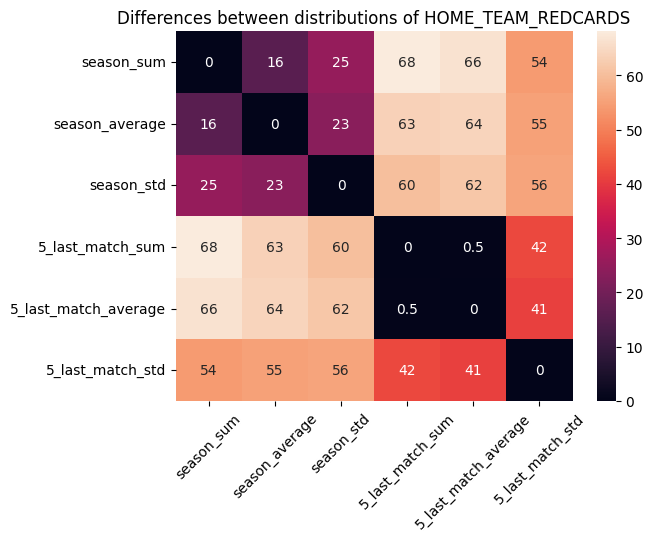

[[ 0.         15.81864923 25.29390449 68.07679809 66.37356219 54.20071924]
 [15.81864923  0.         23.48685575 63.42825852 63.83733383 55.0683075 ]
 [25.29390449 23.48685575  0.         60.31021226 61.62160133 55.58439493]
 [68.07679809 63.42825852 60.31021226  0.          0.49752412 42.26025743]
 [66.37356219 63.83733383 61.62160133  0.49752412  0.         41.18351178]
 [54.20071924 55.0683075  55.58439493 42.26025743 41.18351178  0.        ]]
Metric: HOME_TEAM_OFFSIDES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


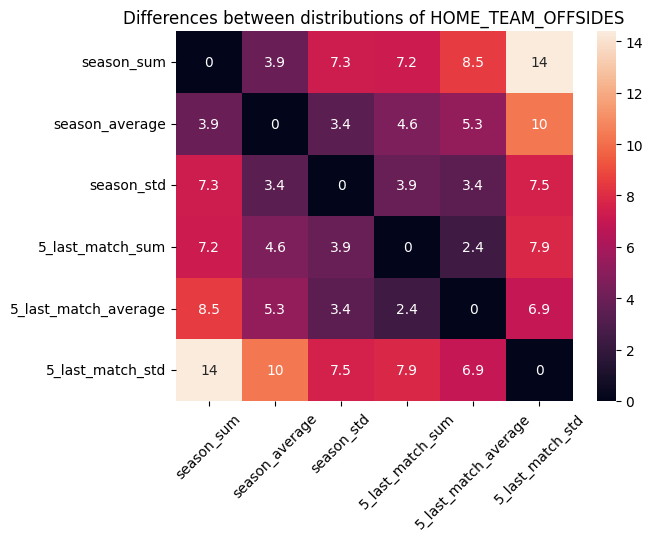

[[ 0.          3.91579949  7.27555593  7.2039015   8.53202598 14.38560249]
 [ 3.91579949  0.          3.40099905  4.58714392  5.31405451 10.29582794]
 [ 7.27555593  3.40099905  0.          3.85729389  3.42861528  7.54280646]
 [ 7.2039015   4.58714392  3.85729389  0.          2.38407139  7.85441829]
 [ 8.53202598  5.31405451  3.42861528  2.38407139  0.          6.92788028]
 [14.38560249 10.29582794  7.54280646  7.85441829  6.92788028  0.        ]]
Metric: HOME_TEAM_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


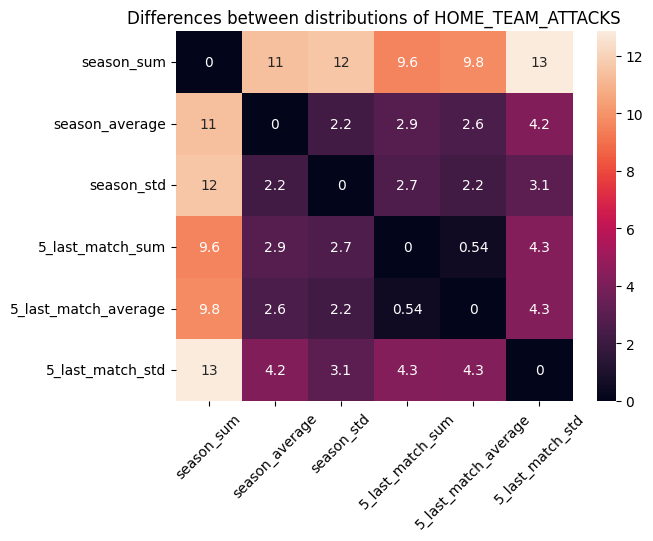

[[ 0.         11.38824638 11.56357523  9.57844534  9.75406294 12.84666078]
 [11.38824638  0.          2.24090477  2.88526841  2.55864703  4.21040103]
 [11.56357523  2.24090477  0.          2.65742737  2.23681224  3.07702068]
 [ 9.57844534  2.88526841  2.65742737  0.          0.5352264   4.27440979]
 [ 9.75406294  2.55864703  2.23681224  0.5352264   0.          4.25182146]
 [12.84666078  4.21040103  3.07702068  4.27440979  4.25182146  0.        ]]
Metric: HOME_TEAM_PENALTIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


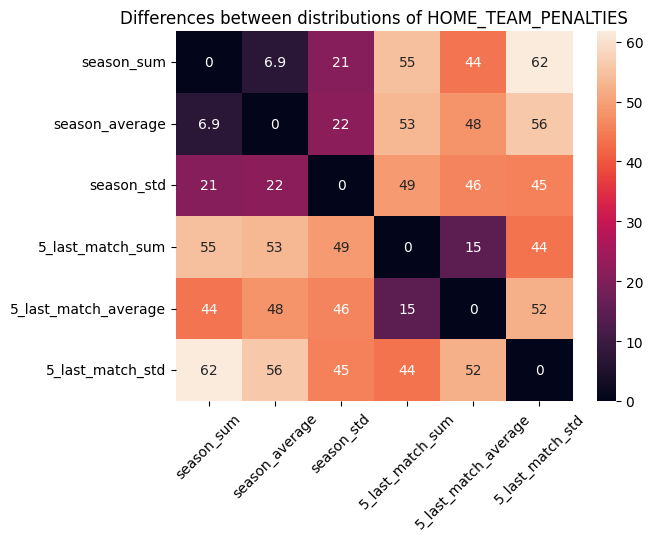

[[ 0.          6.92143468 20.87696788 54.51809067 43.72533464 61.72292452]
 [ 6.92143468  0.         21.5689356  53.41890936 48.22028977 56.15451903]
 [20.87696788 21.5689356   0.         48.97581419 45.92298462 45.36932063]
 [54.51809067 53.41890936 48.97581419  0.         14.75333111 43.57074626]
 [43.72533464 48.22028977 45.92298462 14.75333111  0.         52.21395412]
 [61.72292452 56.15451903 45.36932063 43.57074626 52.21395412  0.        ]]
Metric: HOME_TEAM_SUBSTITUTIONS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


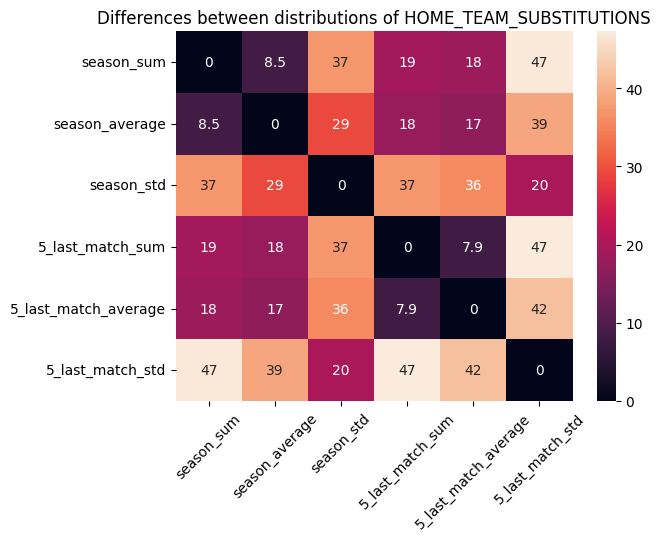

[[ 0.          8.45870079 37.07325948 19.16839993 18.33800559 46.83645725]
 [ 8.45870079  0.         29.24377977 18.03006931 17.14167735 38.8532235 ]
 [37.07325948 29.24377977  0.         37.0221062  35.75001285 19.79791884]
 [19.16839993 18.03006931 37.0221062   0.          7.9438271  47.27243717]
 [18.33800559 17.14167735 35.75001285  7.9438271   0.         41.77160317]
 [46.83645725 38.8532235  19.79791884 47.27243717 41.77160317  0.        ]]
Metric: HOME_TEAM_BALL_SAFE
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


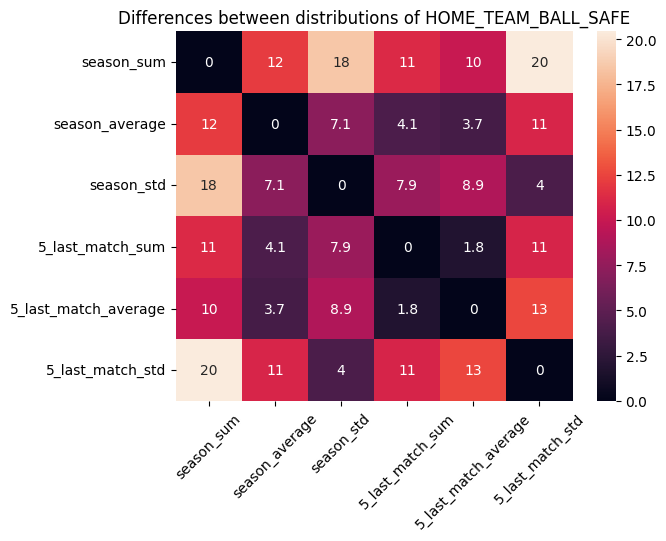

[[ 0.         12.05847391 18.43852053 11.21039627  9.99151736 20.42402654]
 [12.05847391  0.          7.12505244  4.12523889  3.74841356 10.97650401]
 [18.43852053  7.12505244  0.          7.89275257  8.93051591  4.04181426]
 [11.21039627  4.12523889  7.89275257  0.          1.79526954 10.88451251]
 [ 9.99151736  3.74841356  8.93051591  1.79526954  0.         12.53978422]
 [20.42402654 10.97650401  4.04181426 10.88451251 12.53978422  0.        ]]
Metric: HOME_TEAM_DANGEROUS_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


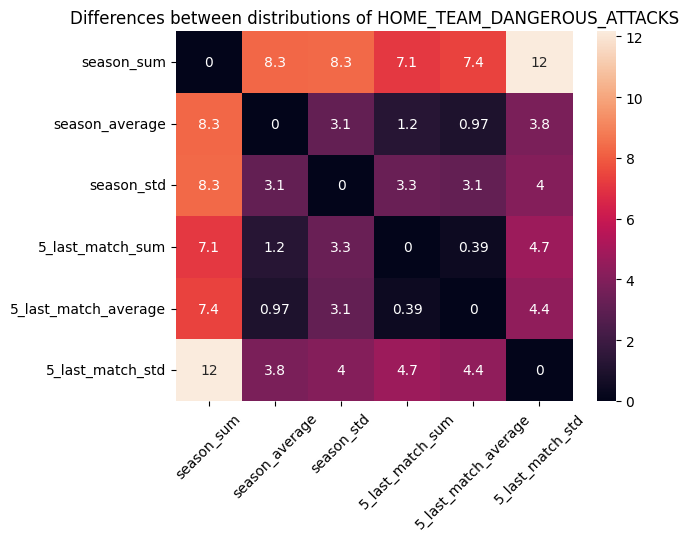

[[ 0.          8.30304586  8.34515496  7.10373312  7.39209756 12.16081409]
 [ 8.30304586  0.          3.09087471  1.24169817  0.97068377  3.80005807]
 [ 8.34515496  3.09087471  0.          3.29710716  3.09733154  4.04730071]
 [ 7.10373312  1.24169817  3.29710716  0.          0.39464617  4.7408363 ]
 [ 7.39209756  0.97068377  3.09733154  0.39464617  0.          4.41177713]
 [12.16081409  3.80005807  4.04730071  4.7408363   4.41177713  0.        ]]
Metric: HOME_TEAM_INJURIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


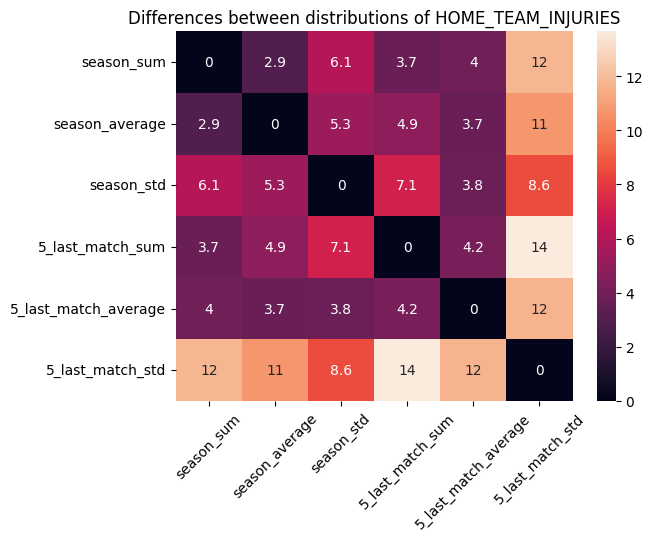

[[ 0.          2.8945224   6.10724139  3.6911622   3.99650357 11.76719994]
 [ 2.8945224   0.          5.31431014  4.90249545  3.68913054 10.67399945]
 [ 6.10724139  5.31431014  0.          7.13918889  3.75963797  8.57845251]
 [ 3.6911622   4.90249545  7.13918889  0.          4.18046877 13.65045642]
 [ 3.99650357  3.68913054  3.75963797  4.18046877  0.         11.67643248]
 [11.76719994 10.67399945  8.57845251 13.65045642 11.67643248  0.        ]]
Metric: HOME_TEAM_GOALS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


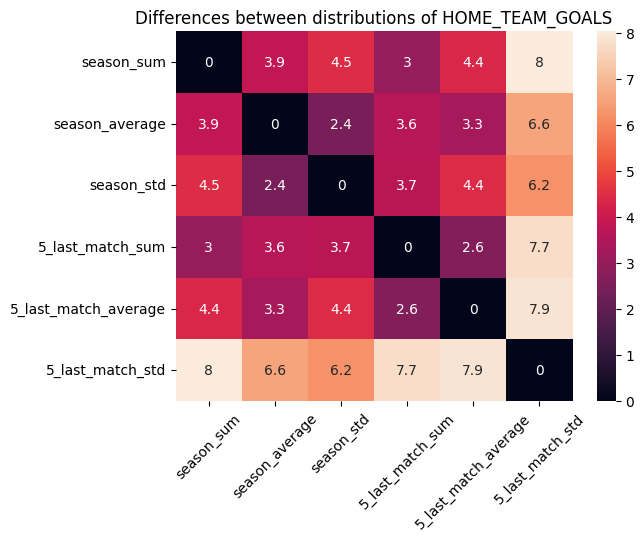

[[0.         3.85172185 4.46618656 3.01337574 4.35756163 8.03008487]
 [3.85172185 0.         2.44740749 3.6366346  3.3123541  6.56011342]
 [4.46618656 2.44740749 0.         3.67595732 4.43550307 6.22392824]
 [3.01337574 3.6366346  3.67595732 0.         2.63932022 7.72284191]
 [4.35756163 3.3123541  4.43550307 2.63932022 0.         7.85826529]
 [8.03008487 6.56011342 6.22392824 7.72284191 7.85826529 0.        ]]
Metric: HOME_TEAM_GAME_WON
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


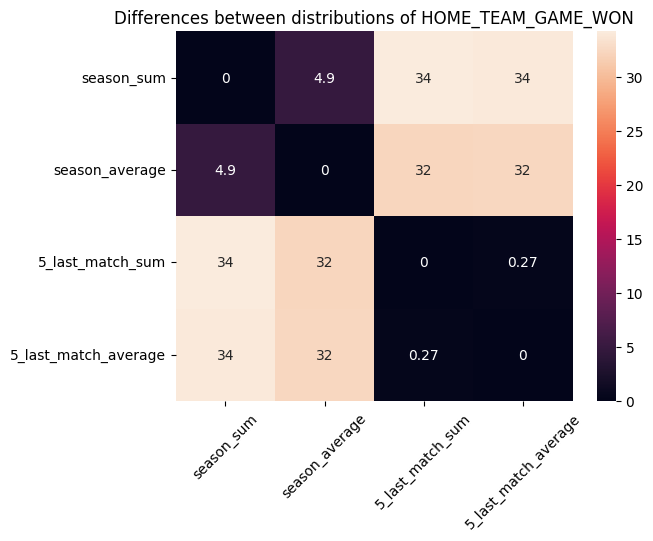

[[ 0.          4.87757993 34.17487858 33.96280342]
 [ 4.87757993  0.         32.26907588 32.31393931]
 [34.17487858 32.26907588  0.          0.27438706]
 [33.96280342 32.31393931  0.27438706  0.        ]]
Metric: HOME_TEAM_GAME_DRAW
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


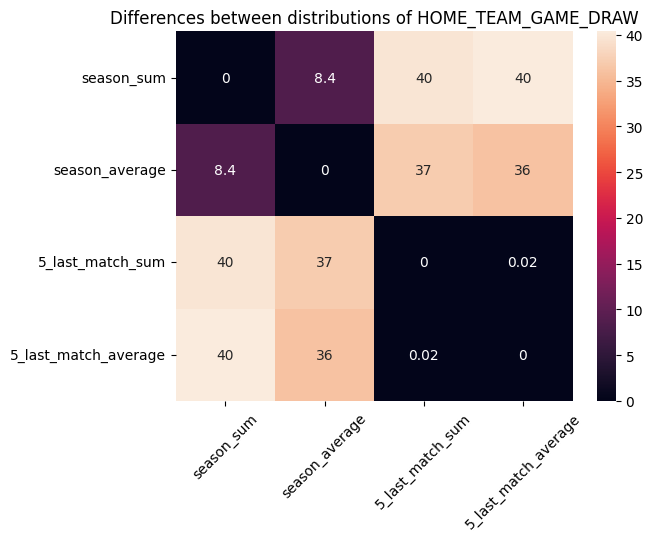

[[0.00000000e+00 8.37483817e+00 3.97632195e+01 4.03961809e+01]
 [8.37483817e+00 0.00000000e+00 3.70563537e+01 3.60798077e+01]
 [3.97632195e+01 3.70563537e+01 0.00000000e+00 1.97099444e-02]
 [4.03961809e+01 3.60798077e+01 1.97099444e-02 0.00000000e+00]]
Metric: HOME_TEAM_GAME_LOST
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


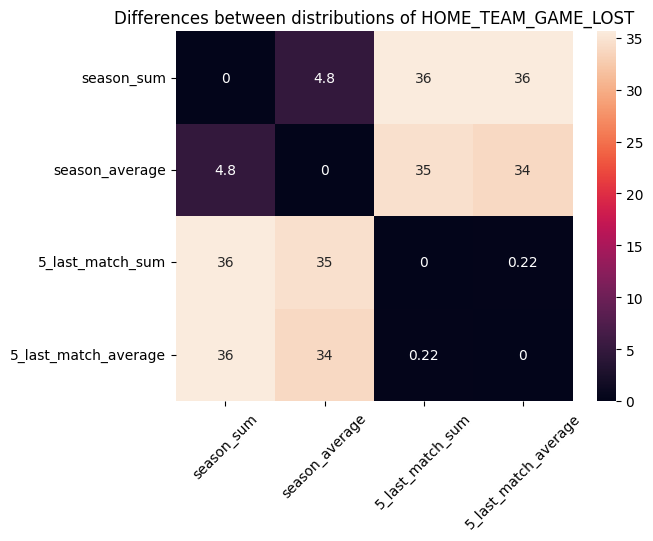

[[ 0.          4.83777469 35.61248184 35.52275296]
 [ 4.83777469  0.         34.54804757 33.93450441]
 [35.61248184 34.54804757  0.          0.21637099]
 [35.52275296 33.93450441  0.21637099  0.        ]]
Metric: HOME_TEAM_SUCCESSFUL_PASSES_PERCENTAGE
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


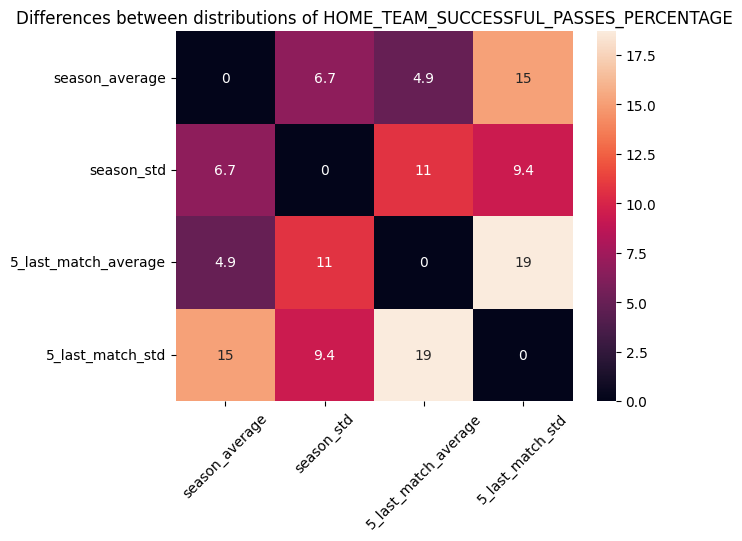

[[ 0.          6.701421    4.92697345 15.15448074]
 [ 6.701421    0.         10.67725738  9.39117394]
 [ 4.92697345 10.67725738  0.         18.6901434 ]
 [15.15448074  9.39117394 18.6901434   0.        ]]
Metric: HOME_TEAM_BALL_POSSESSION
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


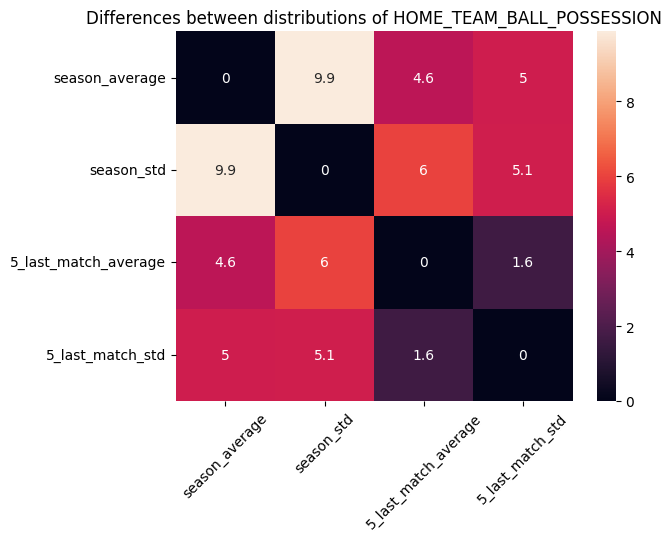

[[0.         9.86761159 4.56807667 5.04047628]
 [9.86761159 0.         6.00677241 5.06067945]
 [4.56807667 6.00677241 0.         1.64606931]
 [5.04047628 5.06067945 1.64606931 0.        ]]
Metric: AWAY_TEAM_SHOTS_TOTAL
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


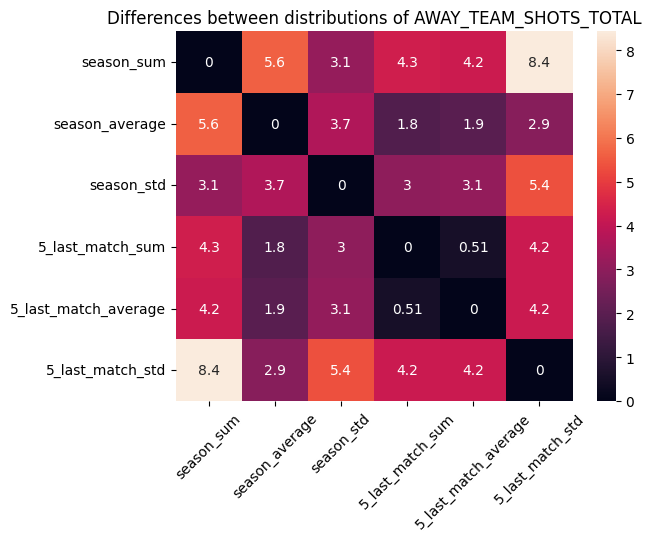

[[0.         5.61446399 3.14968795 4.31725373 4.21932548 8.42775544]
 [5.61446399 0.         3.67409362 1.78900411 1.94698807 2.86462769]
 [3.14968795 3.67409362 0.         3.0190604  3.10758237 5.36473943]
 [4.31725373 1.78900411 3.0190604  0.         0.51145927 4.20780059]
 [4.21932548 1.94698807 3.10758237 0.51145927 0.         4.19003176]
 [8.42775544 2.86462769 5.36473943 4.20780059 4.19003176 0.        ]]
Metric: AWAY_TEAM_SHOTS_INSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


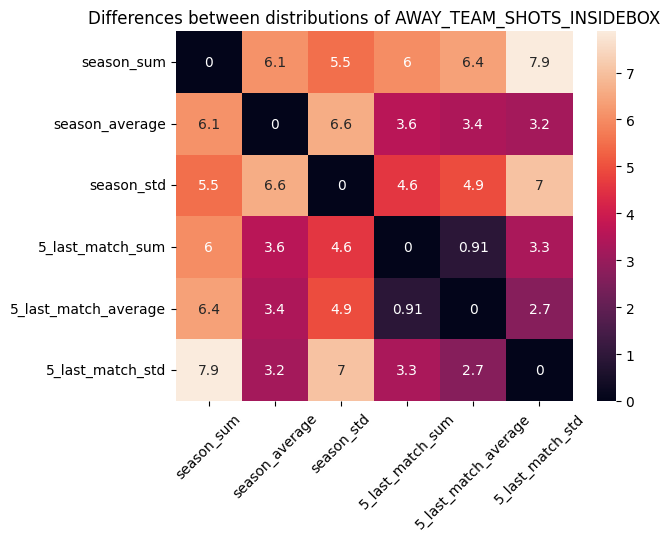

[[0.         6.10897649 5.50045322 6.00286844 6.37700347 7.87851465]
 [6.10897649 0.         6.61378703 3.58487244 3.37365478 3.20670393]
 [5.50045322 6.61378703 0.         4.58402344 4.92542594 7.04537244]
 [6.00286844 3.58487244 4.58402344 0.         0.90901022 3.29397123]
 [6.37700347 3.37365478 4.92542594 0.90901022 0.         2.65361596]
 [7.87851465 3.20670393 7.04537244 3.29397123 2.65361596 0.        ]]
Metric: AWAY_TEAM_SHOTS_OFF_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


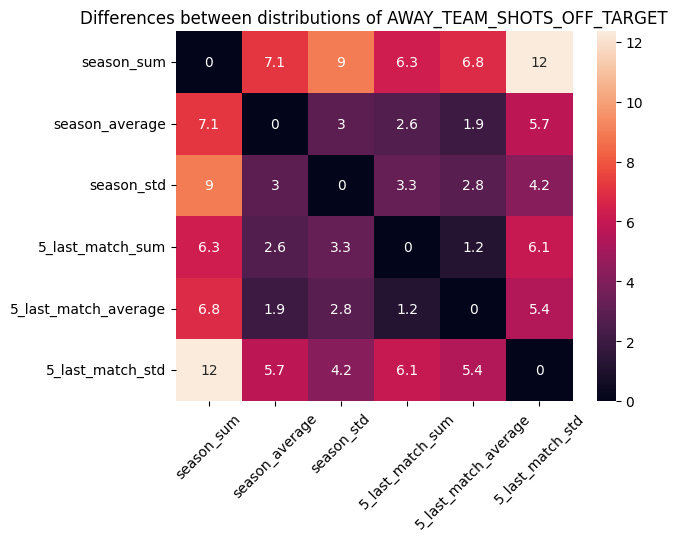

[[ 0.          7.14651043  8.96968918  6.31320184  6.8253849  12.34843931]
 [ 7.14651043  0.          2.98926257  2.63787501  1.94509228  5.74596338]
 [ 8.96968918  2.98926257  0.          3.26764429  2.81943223  4.23177317]
 [ 6.31320184  2.63787501  3.26764429  0.          1.19922144  6.05097593]
 [ 6.8253849   1.94509228  2.81943223  1.19922144  0.          5.44959763]
 [12.34843931  5.74596338  4.23177317  6.05097593  5.44959763  0.        ]]
Metric: AWAY_TEAM_SHOTS_ON_TARGET
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


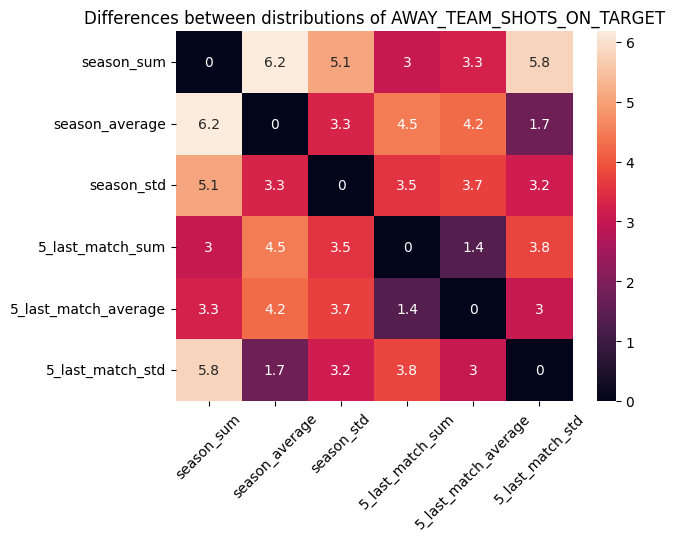

[[0.         6.17526904 5.07929166 3.03725692 3.25346321 5.80086104]
 [6.17526904 0.         3.30212025 4.46649908 4.24920065 1.7354669 ]
 [5.07929166 3.30212025 0.         3.54017778 3.71303773 3.1563858 ]
 [3.03725692 4.46649908 3.54017778 0.         1.36199452 3.76465716]
 [3.25346321 4.24920065 3.71303773 1.36199452 0.         3.03161186]
 [5.80086104 1.7354669  3.1563858  3.76465716 3.03161186 0.        ]]
Metric: AWAY_TEAM_SHOTS_OUTSIDEBOX
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


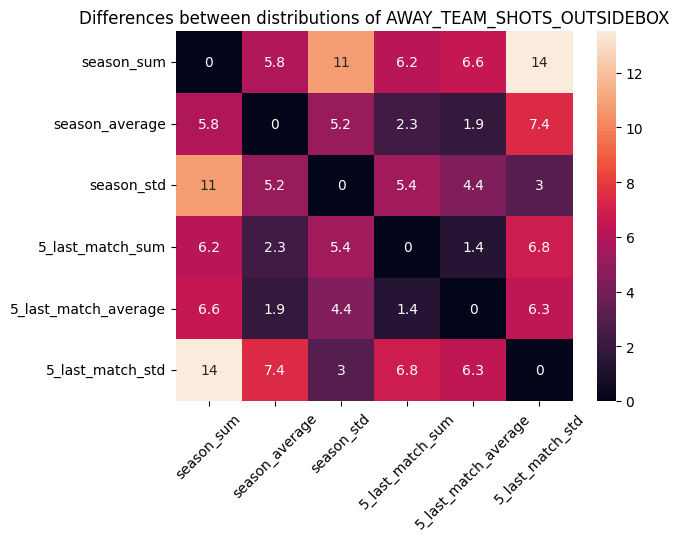

[[ 0.          5.84377694 10.80423635  6.16127179  6.56411487 13.51156097]
 [ 5.84377694  0.          5.15756381  2.33723761  1.87957078  7.40565584]
 [10.80423635  5.15756381  0.          5.40342981  4.36071672  3.04923064]
 [ 6.16127179  2.33723761  5.40342981  0.          1.37224098  6.82895771]
 [ 6.56411487  1.87957078  4.36071672  1.37224098  0.          6.34510861]
 [13.51156097  7.40565584  3.04923064  6.82895771  6.34510861  0.        ]]
Metric: AWAY_TEAM_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


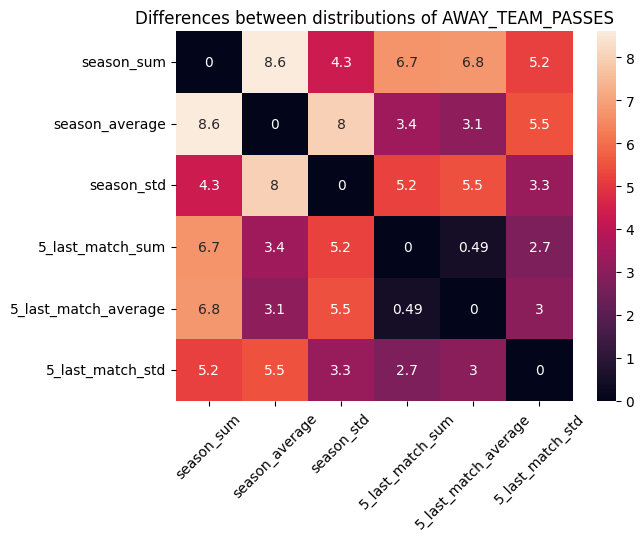

[[0.         8.59802885 4.33188397 6.69849692 6.78047501 5.17155484]
 [8.59802885 0.         7.98552826 3.41595507 3.05769427 5.4899967 ]
 [4.33188397 7.98552826 0.         5.21008305 5.46643327 3.28156008]
 [6.69849692 3.41595507 5.21008305 0.         0.4878379  2.72932837]
 [6.78047501 3.05769427 5.46643327 0.4878379  0.         2.96413945]
 [5.17155484 5.4899967  3.28156008 2.72932837 2.96413945 0.        ]]
Metric: AWAY_TEAM_SUCCESSFUL_PASSES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


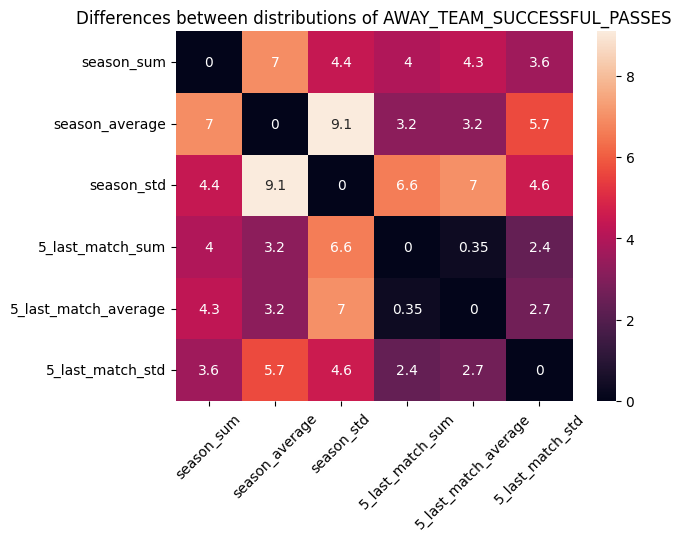

[[0.         6.95431444 4.42116481 3.95638911 4.29275476 3.59947604]
 [6.95431444 0.         9.08575094 3.21672625 3.22791617 5.65312114]
 [4.42116481 9.08575094 0.         6.60402427 7.01603575 4.56085086]
 [3.95638911 3.21672625 6.60402427 0.         0.34711467 2.36686068]
 [4.29275476 3.22791617 7.01603575 0.34711467 0.         2.65627674]
 [3.59947604 5.65312114 4.56085086 2.36686068 2.65627674 0.        ]]
Metric: AWAY_TEAM_SAVES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


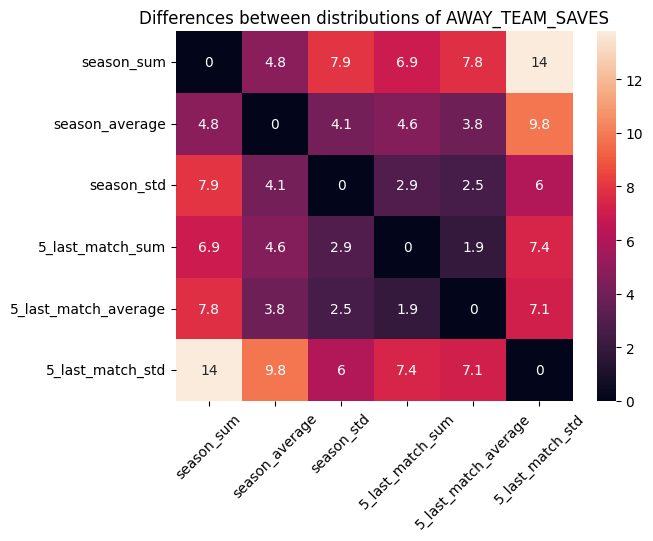

[[ 0.          4.78019494  7.93261844  6.89229014  7.7889379  13.78149146]
 [ 4.78019494  0.          4.13333397  4.58638529  3.84753548  9.82996142]
 [ 7.93261844  4.13333397  0.          2.85383658  2.54229418  6.03851722]
 [ 6.89229014  4.58638529  2.85383658  0.          1.892289    7.41655083]
 [ 7.7889379   3.84753548  2.54229418  1.892289    0.          7.11914958]
 [13.78149146  9.82996142  6.03851722  7.41655083  7.11914958  0.        ]]
Metric: AWAY_TEAM_CORNERS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


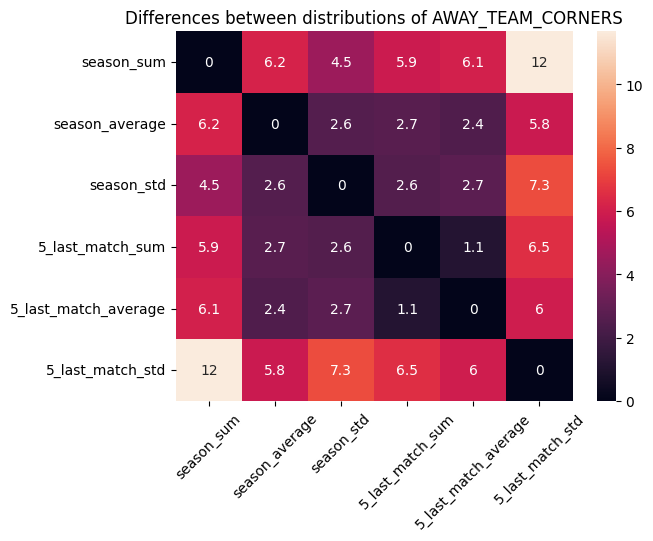

[[ 0.          6.17420674  4.53652989  5.86994708  6.09436021 11.66570856]
 [ 6.17420674  0.          2.58118694  2.67420668  2.42582715  5.79845414]
 [ 4.53652989  2.58118694  0.          2.55117549  2.74315457  7.30897913]
 [ 5.86994708  2.67420668  2.55117549  0.          1.13205394  6.54073997]
 [ 6.09436021  2.42582715  2.74315457  1.13205394  0.          5.96332618]
 [11.66570856  5.79845414  7.30897913  6.54073997  5.96332618  0.        ]]
Metric: AWAY_TEAM_FOULS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


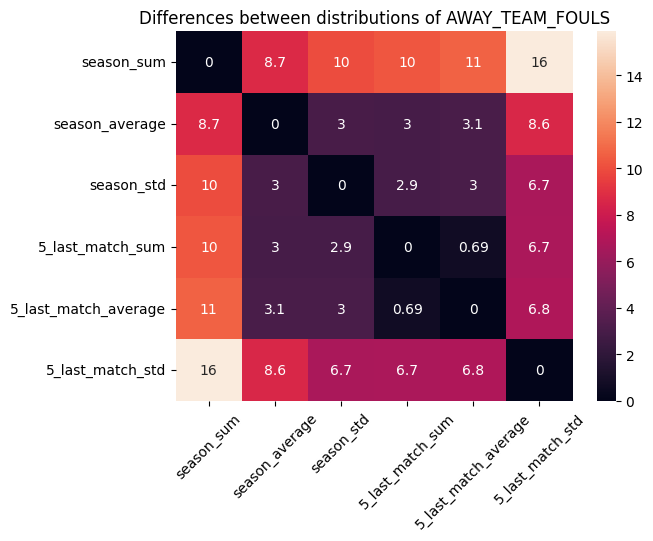

[[ 0.          8.72913878  9.95095301 10.2918216  10.62970856 15.88344091]
 [ 8.72913878  0.          2.99584911  2.97473457  3.08709638  8.62206325]
 [ 9.95095301  2.99584911  0.          2.92607062  3.04185454  6.69552563]
 [10.2918216   2.97473457  2.92607062  0.          0.69422869  6.70860839]
 [10.62970856  3.08709638  3.04185454  0.69422869  0.          6.83233809]
 [15.88344091  8.62206325  6.69552563  6.70860839  6.83233809  0.        ]]
Metric: AWAY_TEAM_YELLOWCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


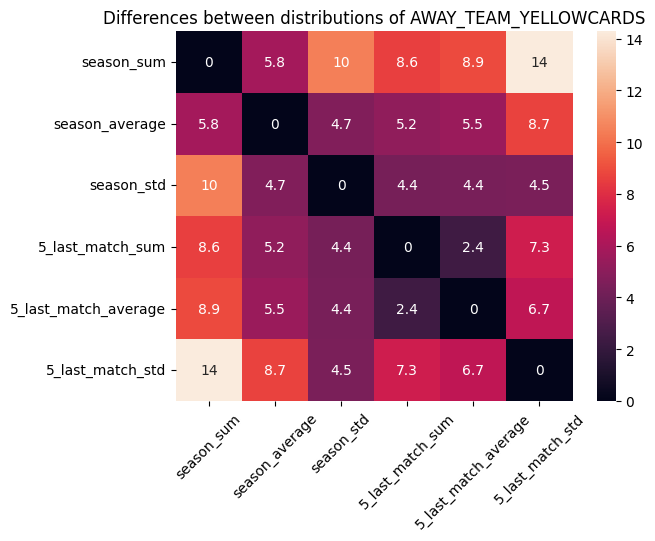

[[ 0.          5.84137659 10.43314837  8.56990616  8.87529587 14.28061554]
 [ 5.84137659  0.          4.68502788  5.18225087  5.50937448  8.6621204 ]
 [10.43314837  4.68502788  0.          4.35109789  4.40077362  4.453787  ]
 [ 8.56990616  5.18225087  4.35109789  0.          2.35138009  7.29635869]
 [ 8.87529587  5.50937448  4.40077362  2.35138009  0.          6.74730329]
 [14.28061554  8.6621204   4.453787    7.29635869  6.74730329  0.        ]]
Metric: AWAY_TEAM_REDCARDS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


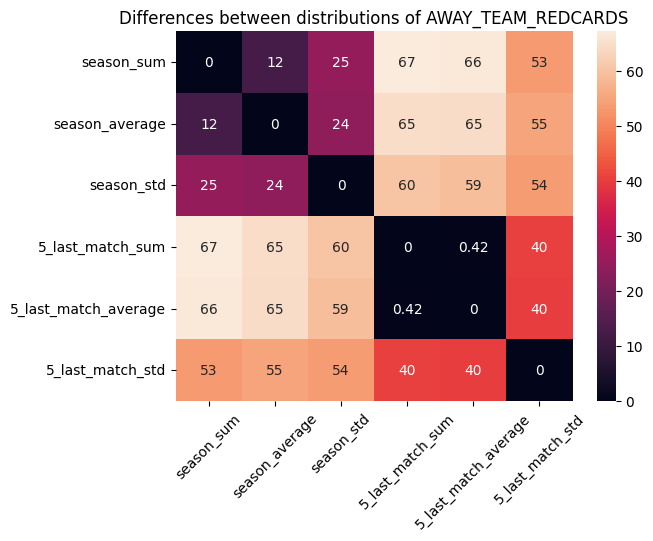

[[ 0.         12.27940691 25.11881934 67.1869559  66.42494939 53.28872926]
 [12.27940691  0.         24.17824503 64.61140258 64.54359117 54.87458228]
 [25.11881934 24.17824503  0.         60.27736486 59.30472338 53.65439529]
 [67.1869559  64.61140258 60.27736486  0.          0.41695737 40.34800003]
 [66.42494939 64.54359117 59.30472338  0.41695737  0.         40.11381995]
 [53.28872926 54.87458228 53.65439529 40.34800003 40.11381995  0.        ]]
Metric: AWAY_TEAM_OFFSIDES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


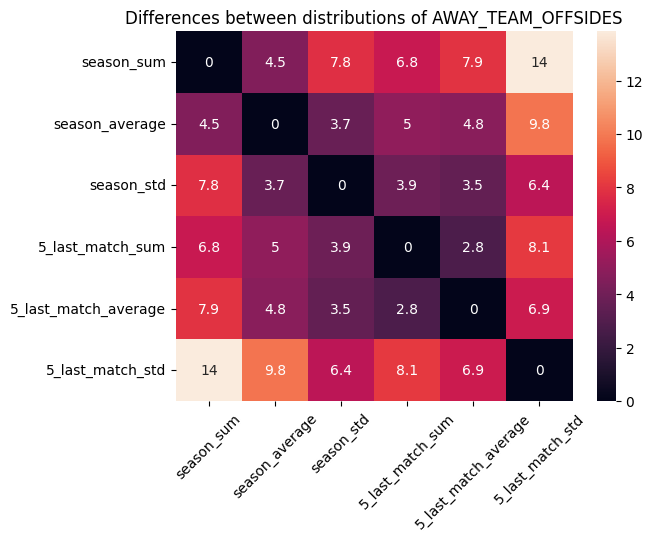

[[ 0.          4.52874239  7.82612192  6.82323306  7.92686905 13.84317895]
 [ 4.52874239  0.          3.72770467  5.0205089   4.78066103  9.83877796]
 [ 7.82612192  3.72770467  0.          3.85037562  3.54042208  6.42305349]
 [ 6.82323306  5.0205089   3.85037562  0.          2.80964092  8.11355923]
 [ 7.92686905  4.78066103  3.54042208  2.80964092  0.          6.94684902]
 [13.84317895  9.83877796  6.42305349  8.11355923  6.94684902  0.        ]]
Metric: AWAY_TEAM_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


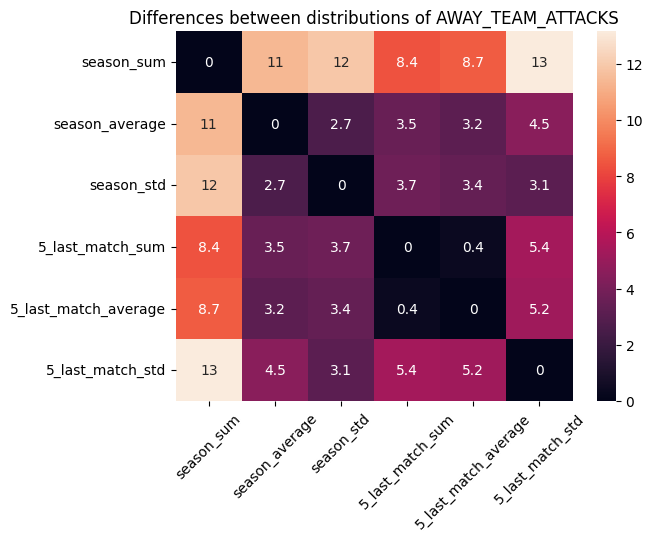

[[ 0.         11.39139263 11.87051764  8.38923638  8.66103625 13.14581035]
 [11.39139263  0.          2.65820807  3.4973342   3.16766062  4.52778655]
 [11.87051764  2.65820807  0.          3.7405736   3.41028755  3.13190613]
 [ 8.38923638  3.4973342   3.7405736   0.          0.4030563   5.36958849]
 [ 8.66103625  3.16766062  3.41028755  0.4030563   0.          5.20287541]
 [13.14581035  4.52778655  3.13190613  5.36958849  5.20287541  0.        ]]
Metric: AWAY_TEAM_PENALTIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


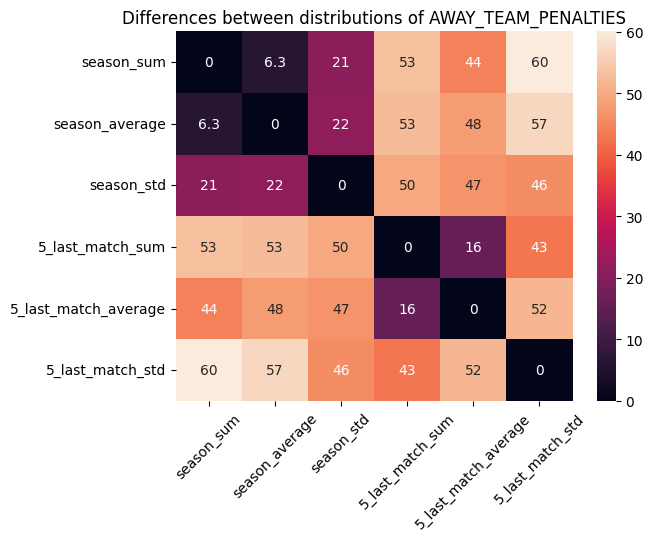

[[ 0.          6.26529979 21.23559875 53.0874877  44.12597358 60.04884555]
 [ 6.26529979  0.         21.68727253 52.68709153 47.87209    56.98107562]
 [21.23559875 21.68727253  0.         49.82188673 46.7308213  45.88067482]
 [53.0874877  52.68709153 49.82188673  0.         15.84359708 42.81853443]
 [44.12597358 47.87209    46.7308213  15.84359708  0.         51.72415606]
 [60.04884555 56.98107562 45.88067482 42.81853443 51.72415606  0.        ]]
Metric: AWAY_TEAM_SUBSTITUTIONS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


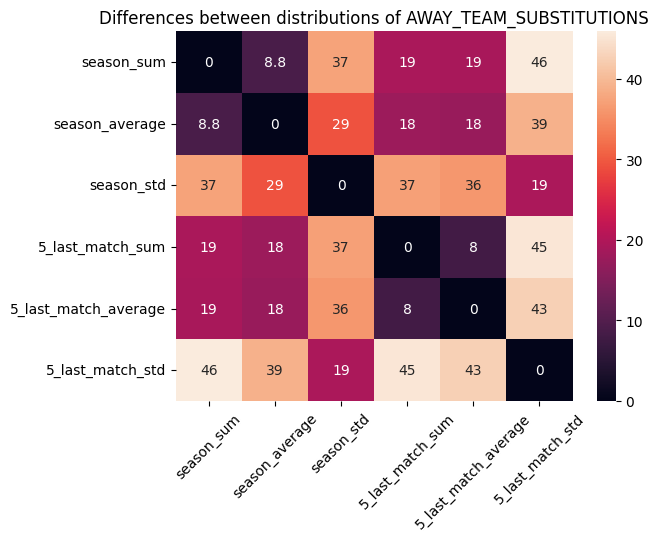

[[ 0.          8.80607881 37.34778457 19.29602991 19.12087035 45.90697005]
 [ 8.80607881  0.         29.24301086 17.80427517 17.51453172 38.96706115]
 [37.34778457 29.24301086  0.         37.08828778 36.22339433 19.40317963]
 [19.29602991 17.80427517 37.08828778  0.          8.03023027 45.32889036]
 [19.12087035 17.51453172 36.22339433  8.03023027  0.         42.60701791]
 [45.90697005 38.96706115 19.40317963 45.32889036 42.60701791  0.        ]]
Metric: AWAY_TEAM_BALL_SAFE
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


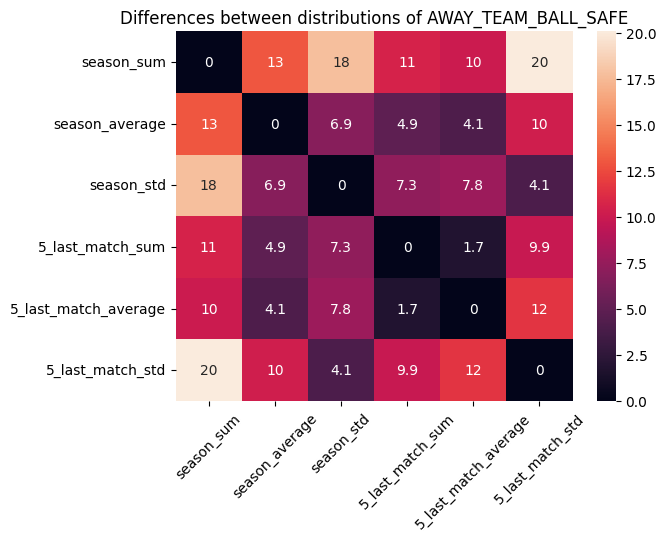

[[ 0.         12.96807578 17.74498373 10.63787556 10.04845526 20.08618453]
 [12.96807578  0.          6.87215598  4.87675834  4.12172674 10.32013697]
 [17.74498373  6.87215598  0.          7.29657261  7.79130271  4.06823092]
 [10.63787556  4.87675834  7.29657261  0.          1.73565014  9.87791227]
 [10.04845526  4.12172674  7.79130271  1.73565014  0.         11.53877676]
 [20.08618453 10.32013697  4.06823092  9.87791227 11.53877676  0.        ]]
Metric: AWAY_TEAM_DANGEROUS_ATTACKS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


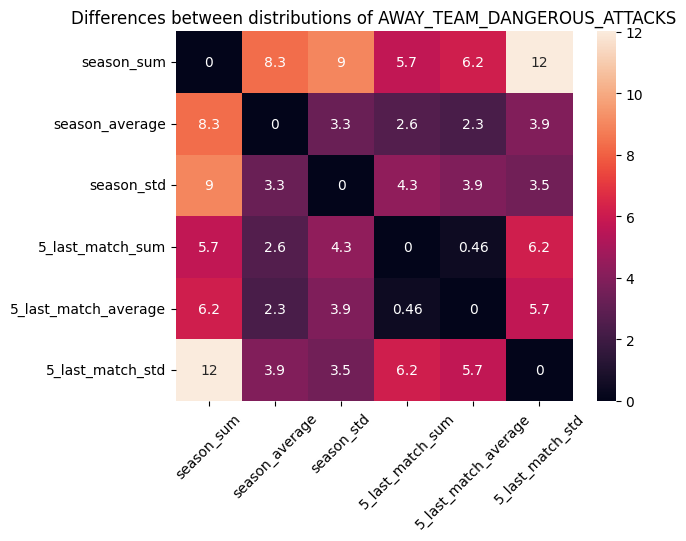

[[ 0.          8.31548414  8.99515751  5.68935231  6.18008786 12.00505188]
 [ 8.31548414  0.          3.25109568  2.59516845  2.34025552  3.93864127]
 [ 8.99515751  3.25109568  0.          4.32586747  3.88465357  3.47229644]
 [ 5.68935231  2.59516845  4.32586747  0.          0.45704083  6.18691391]
 [ 6.18008786  2.34025552  3.88465357  0.45704083  0.          5.71309101]
 [12.00505188  3.93864127  3.47229644  6.18691391  5.71309101  0.        ]]
Metric: AWAY_TEAM_INJURIES
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


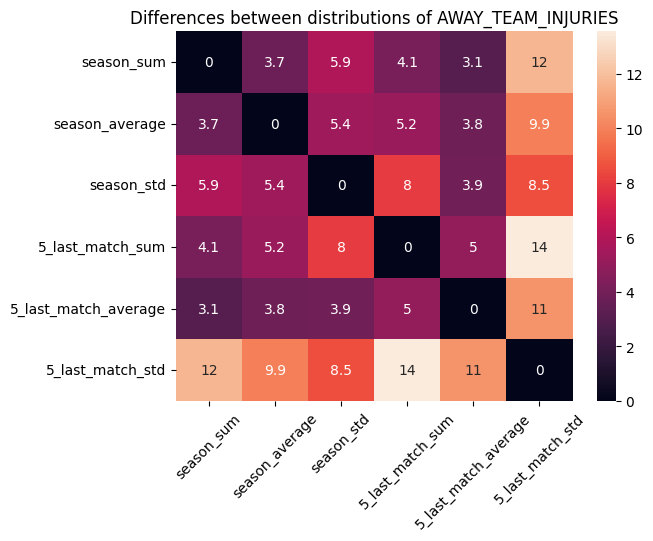

[[ 0.          3.72299368  5.87776836  4.133144    3.06369405 11.67787379]
 [ 3.72299368  0.          5.37234098  5.19247111  3.801485    9.90613358]
 [ 5.87776836  5.37234098  0.          8.01831547  3.94100865  8.52672499]
 [ 4.133144    5.19247111  8.01831547  0.          5.01034482 13.5538071 ]
 [ 3.06369405  3.801485    3.94100865  5.01034482  0.         10.54937533]
 [11.67787379  9.90613358  8.52672499 13.5538071  10.54937533  0.        ]]
Metric: AWAY_TEAM_GOALS
Aggregate function names: ['season_sum', 'season_average', 'season_std', '5_last_match_sum', '5_last_match_average', '5_last_match_std']


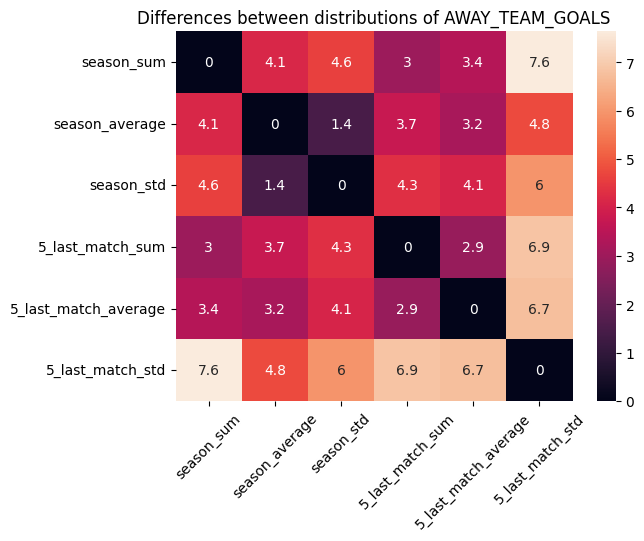

[[0.         4.14369837 4.59452061 2.96974167 3.4215992  7.6361562 ]
 [4.14369837 0.         1.44043256 3.74233337 3.19078324 4.76250158]
 [4.59452061 1.44043256 0.         4.30159938 4.0653108  5.9521597 ]
 [2.96974167 3.74233337 4.30159938 0.         2.87538672 6.85926764]
 [3.4215992  3.19078324 4.0653108  2.87538672 0.         6.74816693]
 [7.6361562  4.76250158 5.9521597  6.85926764 6.74816693 0.        ]]
Metric: AWAY_TEAM_GAME_WON
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


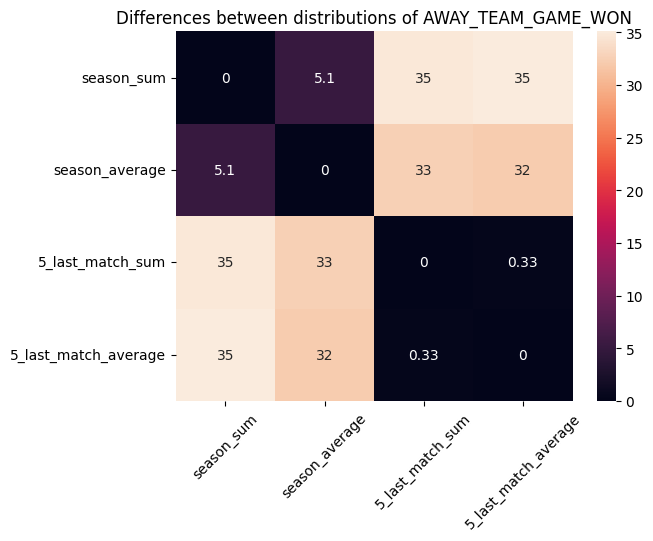

[[ 0.          5.11895763 34.73007241 35.07896498]
 [ 5.11895763  0.         32.51224418 32.07945442]
 [34.73007241 32.51224418  0.          0.33193226]
 [35.07896498 32.07945442  0.33193226  0.        ]]
Metric: AWAY_TEAM_GAME_DRAW
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


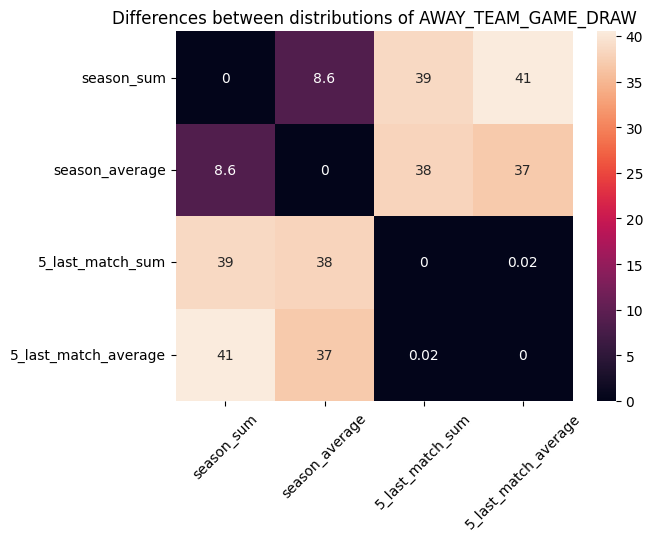

[[0.00000000e+00 8.62159057e+00 3.85234677e+01 4.05051330e+01]
 [8.62159057e+00 0.00000000e+00 3.80307480e+01 3.68946280e+01]
 [3.85234677e+01 3.80307480e+01 0.00000000e+00 2.03590966e-02]
 [4.05051330e+01 3.68946280e+01 2.03590966e-02 0.00000000e+00]]
Metric: AWAY_TEAM_GAME_LOST
Aggregate function names: ['season_sum', 'season_average', '5_last_match_sum', '5_last_match_average']


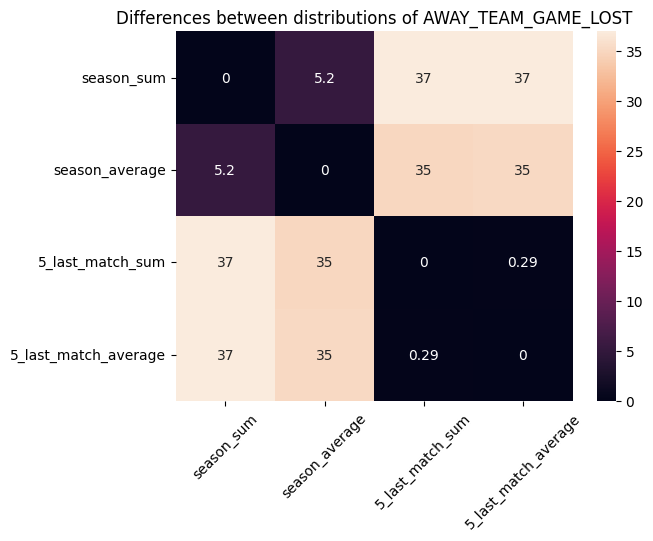

[[ 0.          5.23956475 36.92036094 36.81515402]
 [ 5.23956475  0.         34.97349709 35.16399051]
 [36.92036094 34.97349709  0.          0.28713205]
 [36.81515402 35.16399051  0.28713205  0.        ]]
Metric: AWAY_TEAM_SUCCESSFUL_PASSES_PERCENTAGE
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


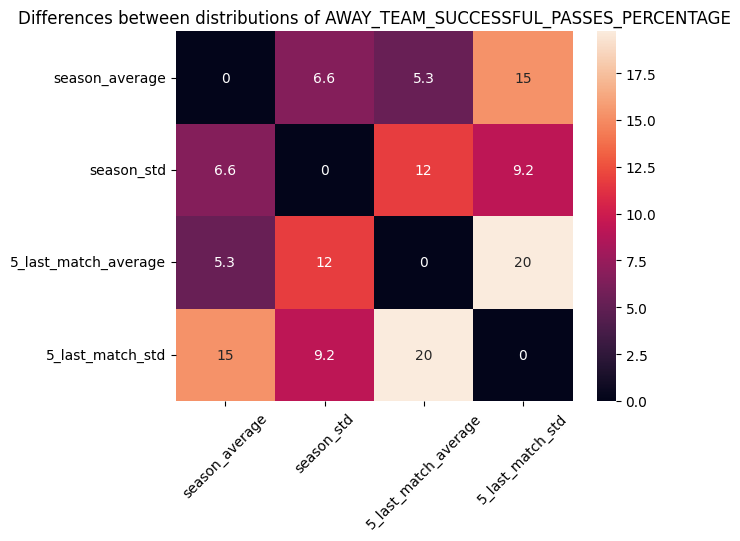

[[ 0.          6.58866623  5.27717183 15.27798189]
 [ 6.58866623  0.         11.75137764  9.18541525]
 [ 5.27717183 11.75137764  0.         19.72862236]
 [15.27798189  9.18541525 19.72862236  0.        ]]
Metric: AWAY_TEAM_BALL_POSSESSION
Aggregate function names: ['season_average', 'season_std', '5_last_match_average', '5_last_match_std']


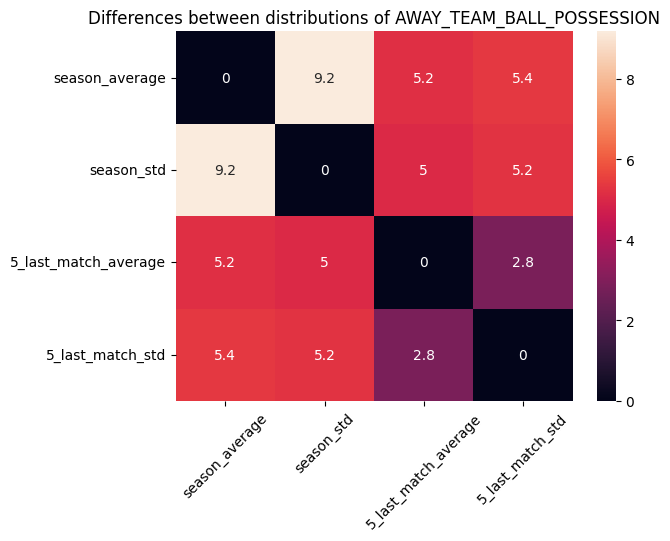

[[0.         9.17283503 5.18512875 5.36214272]
 [9.17283503 0.         5.03667867 5.24852506]
 [5.18512875 5.03667867 0.         2.83169877]
 [5.36214272 5.24852506 2.83169877 0.        ]]


In [4]:
from data_analysis import get_metrics_names_to_fn_names, non_aggregated_teammetric_names

# For each metric, we compare the assiocated to it and plot the matrix of differences
teammetrics_names_to_fn_names = get_metrics_names_to_fn_names(df_teamfeatures_train)

for metric_name in [metric_name for metric_name in teammetrics_names_to_fn_names.keys() if metric_name not in non_aggregated_teammetric_names][:99]:
    print(f"Metric: {metric_name}")
    column_names = teammetrics_names_to_fn_names[metric_name]
    n_columns = len(column_names)
    print(f"Aggregate function names: {column_names}")
    matrix_of_differences = np.zeros((len(column_names), len(column_names)))
    
    for i in range(n_columns):
        for j in range(i, n_columns):
            aggregate_function_name1 = column_names[i]
            aggregate_function_name2 = column_names[j]
            loss_name_to_normalized_difference = compute_distribution_difference(
                feature_serie1=df_teamfeatures_train[f'{metric_name}_{aggregate_function_name1}'],
                feature_serie2=df_teamfeatures_train[f'{metric_name}_{aggregate_function_name2}'],
                n_monte_carlo=100,
            )
            l1_loss_value = loss_name_to_normalized_difference['l1_loss']
            matrix_of_differences[i, j] = l1_loss_value
            matrix_of_differences[j, i] = l1_loss_value
    fig, ax = plt.subplots()
    sns.heatmap(matrix_of_differences, annot=True, ax=ax)
    ax.set_xticklabels(column_names, rotation=45)
    ax.set_yticklabels(column_names, rotation=0)
    ax.set_title(f"Differences between distributions of {metric_name}")
    plt.show()
    print(matrix_of_differences)
 